In [99]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import cv2

# Load dataset

In [100]:
path = "D:/LFPW"

In [101]:
train_image = np.load(os.path.join(path,"train_image.npy"), allow_pickle=True)
train_annotation = np.load(os.path.join(path,"train_annotation.npy"), allow_pickle=True)
test_image = np.load(os.path.join(path,"test_image.npy"), allow_pickle=True)
test_annotation = np.load(os.path.join(path,"test_annotation.npy"), allow_pickle=True)

# Preprocess image

In [120]:
def make_dataset_float(X, size):
    img_data = []
    for image in X:
        image = cv2.resize(image, (size, size), interpolation=cv2.INTER_NEAREST)
        image = image.astype('float32')
        image /= 255 
        img_data.append(image)
    return np.array(img_data)

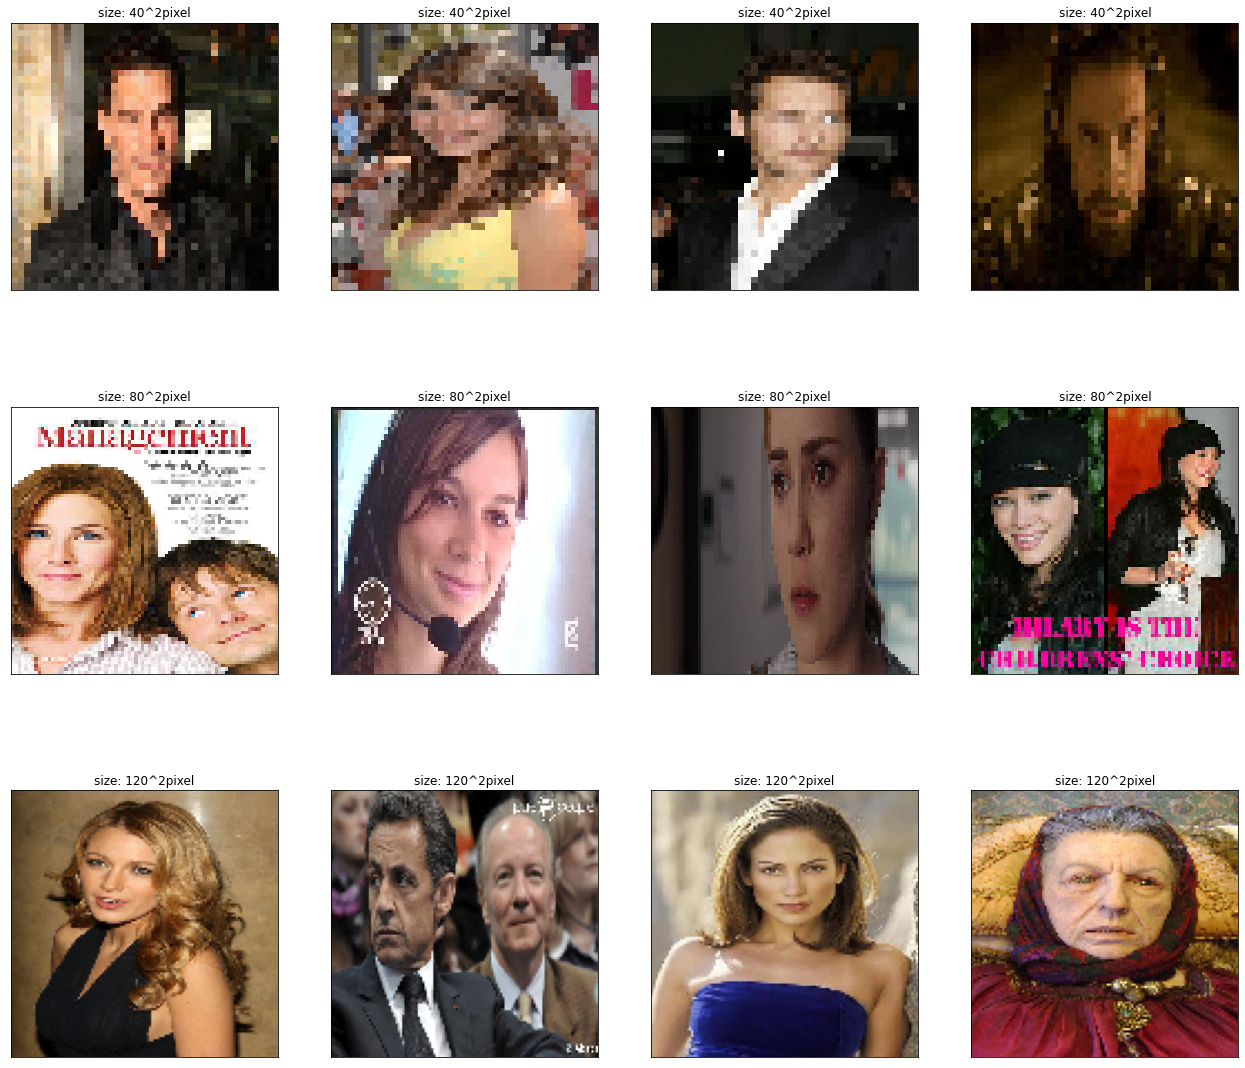

In [103]:
fig, ax = plt.subplots(3, 4, figsize=(22, 20))
for i in range(12):
    j = i//4
    k = i%4
    dataset = make_dataset_float(test_image, (j+1)*40)
    index = np.random.randint(len(dataset))
    ax[j][k].imshow(dataset[index])
    ax[j][k].set_title("size: {}^2pixel".format((j+1)*40))
    ax[j][k].xaxis.set_ticks([])
    ax[j][k].yaxis.set_ticks([])    

# Make dataset for model

In [131]:
X_train = make_dataset_float(train_image, 80)
X_test = make_dataset_float(test_image, 80)
y_train = train_annotation[:, :5]
y_test = test_annotation[:, :5]
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

In [132]:
Input = keras.Input(shape=(80, 80, 3))
x = keras.layers.Conv2D(32, 3, 1, "same", activation="relu", kernel_initializer="he_normal")(Input)
x = keras.layers.Conv2D(32, 3, 1, "same", activation="relu", kernel_initializer="he_normal")(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.GlobalMaxPool2D()(x)
Output = keras.layers.Dense(5, activation="linear")(x)

model = keras.Model(inputs = Input, outputs = Output)

In [133]:
y_test.shape

(224, 5)

In [169]:
model.compile(loss=keras.losses.mse, optimizer="adam", metrics="mse")
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 25ms/step - loss: 15380.0098 - mse: 15380.0098 - val_loss: 7384.5210 - val_mse: 7384.5210
Epoch 2/20
25/25 [==============================] - 0s 14ms/step - loss: 15372.5586 - mse: 15372.5586 - val_loss: 7295.2134 - val_mse: 7295.2134
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 15361.8340 - mse: 15361.8340 - val_loss: 7295.9814 - val_mse: 7295.9814
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 15444.0479 - mse: 15444.0479 - val_loss: 7252.4692 - val_mse: 7252.4692
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 15428.1318 - mse: 15428.1318 - val_loss: 7291.2759 - val_mse: 7291.2759
Epoch 6/20
25/25 [==============================] - 0s 14ms/step - loss: 15346.4199 - mse: 15346.4199 - val_loss: 7285.0386 - val_mse: 7285.0386
Epoch 7/20
25/25 [==============================] - 0s 14ms/step - loss: 15346.1123 - mse: 15346.1123 - val_loss: 7331.2969 - val_

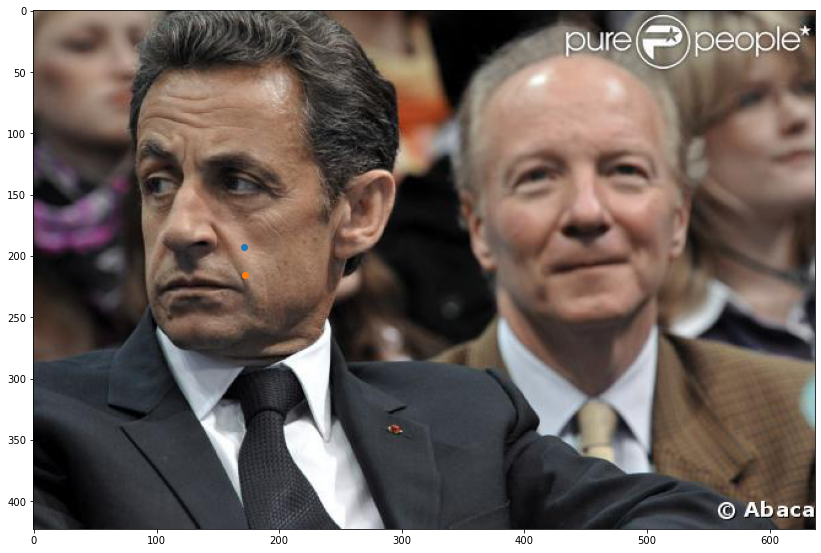

In [171]:
index = 156
fig, ax = plt.subplots(figsize=(14, 14))
pred = model.predict(np.array([X_test[index]]))
ax.imshow(test_image[index])
ax.scatter(pred[0][0],pred[0][1])
ax.scatter(pred[0][3],pred[0][4])

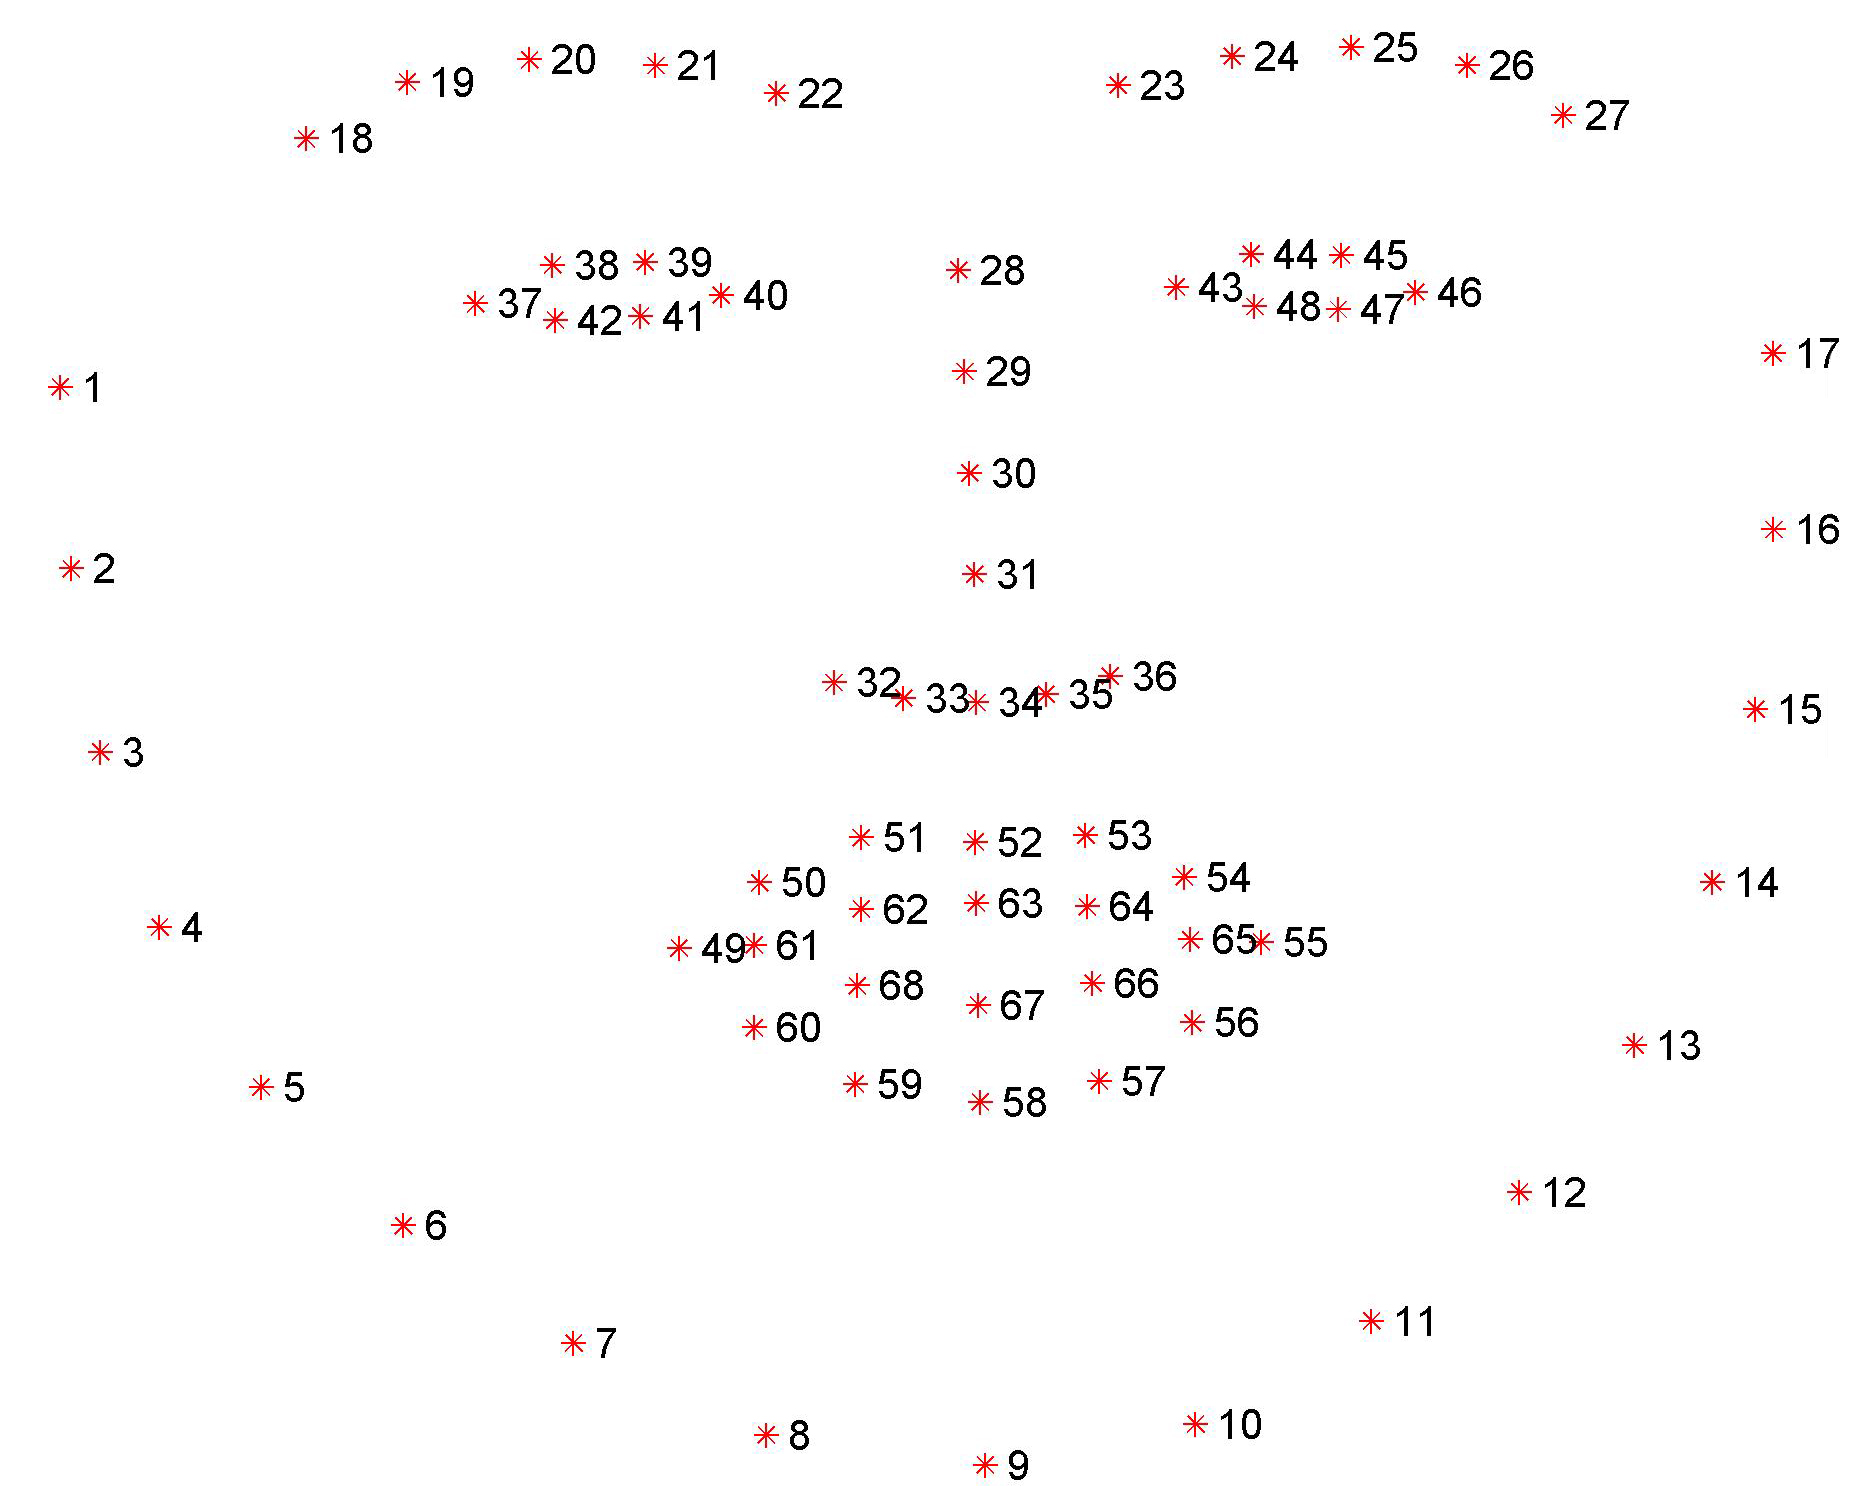

Base model works well.  
Next step  
1. Use high resolution image for training  
2. Makes model more complicate